<a href="https://colab.research.google.com/github/c0037654Newcastle/CSC2034-DS-Project/blob/main/CSC2034_DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC2034 - Data Science Project

##Google Colab Setup

In [ ]:
!git clone https://github.com/c0037654Newcastle/CSC2034-DS-Project.git

Cloning into 'CSC2034-DS-Project'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 40 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), 208.77 KiB | 2.61 MiB/s, done.


In [ ]:
import os
os.chdir('CSC2034-DS-Project')

##Importing the datasets
Importing the datasets for both varieties (red and white) of Portuguese Vinho Verde.

In [ ]:
import pandas as pd

white_path = './data/winequality-white.csv'
red_path = './data/winequality-red.csv'

white_vihno_dataset = pd.read_csv(white_path, header = 0, sep=';')
red_vihno_dataset = pd.read_csv(red_path, header = 0, sep=';')

##Exploratory Data Analysis (EDA)

###1) A
*   Describe the distribution of wine quality across all samples, separately for red and white. (NEED TO DO)
*   Compare the quality distributions between reds and whites. (NEED TO DO)
*   Create suitable plots to illustrate

**NEED TO STILL DO THE FIRST TWO OBJECTIVE**


Distribution of the quality of the white vinho verde in the dataset

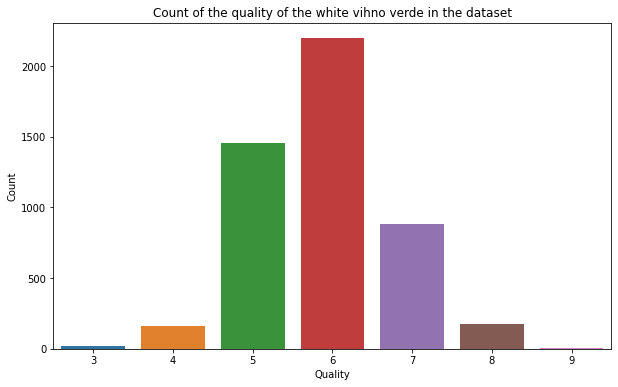

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
sns.countplot(x = "quality", data = white_vihno_dataset)
plt.title("Count of the quality of the white vihno verde in the dataset")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks()
plt.show()
plt.close()

Distribution of the quality of the red vinho verde in the dataset

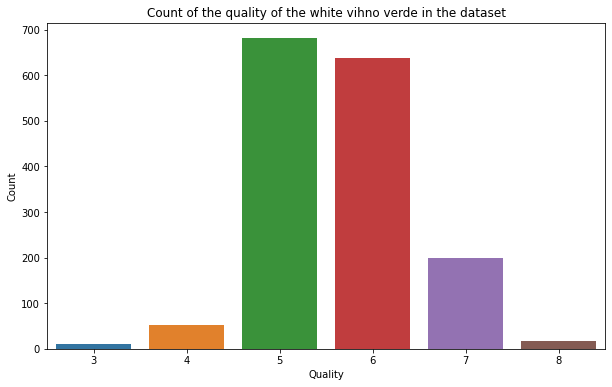

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
sns.countplot(x = "quality", data = red_vihno_dataset)
plt.title("Count of the quality of the white vihno verde in the dataset")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks()
plt.show()
plt.close()

###1) B
*   Discretise the alcohol content variables into low, mid, high based on its distribution.
*   Create a 3-valued "alcohol_cat" variable to represent this.

Finding the average and standard deviation of the red and white vinho verde datasets

In [ ]:
import numpy as np

white_average = np.mean(white_vihno_dataset['alcohol'])
white_stddev = np.std(white_vihno_dataset['alcohol'])
red_average = np.mean(red_vihno_dataset['alcohol'])
red_stddev = np.std(red_vihno_dataset['alcohol'])

print('White Vihno Verde Alcohol Average',white_average)
print('White Vihno Verde Alcohol Standard Deviation',white_stddev)
print('Red Vihno Verde Alcohol Average',red_average)
print('Red Vihno Verde Alcohol Standard Deviation',red_stddev)

White Vihno Verde Alcohol Average 10.514267047774602
White Vihno Verde Alcohol Standard Deviation 1.2304949365418656
Red Vihno Verde Alcohol Average 10.422983114446529
Red Vihno Verde Alcohol Standard Deviation 1.0653343003437483


Defining the alcohol categories for the reader

In [ ]:
print('White Alcohol level is less than',white_average - white_stddev, 'wine will be in the low category')
print('White Alcohol level is greater than',white_average - white_stddev, 'but less than', white_average + white_stddev, 'wine will be in the mid category')
print('White Alcohol level is greater than',white_average + white_stddev, 'wine will be in the hight category')

print()

print('Red Alcohol level is less than',red_average - red_stddev, 'wine will be in the low category')
print('Red Alcohol level is greater than',red_average - red_stddev, 'but less than', red_average + red_stddev, 'wine will be in the mid category')
print('Red Alcohol level is greater than',red_average + red_stddev, 'wine will be in the hight category')

White Alcohol level is less than 9.283772111232736 wine will be in the low category
White Alcohol level is greater than 9.283772111232736 but less than 11.744761984316469 wine will be in the mid category
White Alcohol level is greater than 11.744761984316469 wine will be in the hight category

Red Alcohol level is less than 9.357648814102781 wine will be in the low category
Red Alcohol level is greater than 9.357648814102781 but less than 11.488317414790277 wine will be in the mid category
Red Alcohol level is greater than 11.488317414790277 wine will be in the hight category


Function for categorising the alcohol level into low, mid and high based on the average and standard deviation 

In [ ]:
def alcohol_category(alcohol_level, average, stddev):
  if alcohol_level < (average-stddev):
    return 'low'
  elif alcohol_level < (average + stddev):
    return 'mid'
  else:
    return 'high'

Apply the alcohol category function to red and white vihno verde datasets to create alcohol_cat column, and shows the first 5 entries of the updated dataset


In [ ]:
white_vihno_dataset['alcohol_cat'] = white_vihno_dataset['alcohol'].apply(alcohol_category, args=(white_average, white_stddev,))
red_vihno_dataset['alcohol_cat'] = red_vihno_dataset['alcohol'].apply(alcohol_category, args=(red_average, red_stddev,))

print(f"List of features:\n\t{white_vihno_dataset.columns}")

print(f"\nExamining the dataset:")
display(white_vihno_dataset)

List of features:
	Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'alcohol_cat'],
      dtype='object')

Examining the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,low
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,mid
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,mid
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,mid
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,mid
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,mid
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,mid
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high


###1) C
*   Describe the distribution of wine quality as in (1.A), but separately for low-, mid-, and high-alcohol content.
*   Create suitable plots to illustrate.
*    Can you draw any conclusions on the relationship between alcohol content and quality?



Histogram to show the cumulative value for each alcohol_cat in the White Vihno Verde dataset

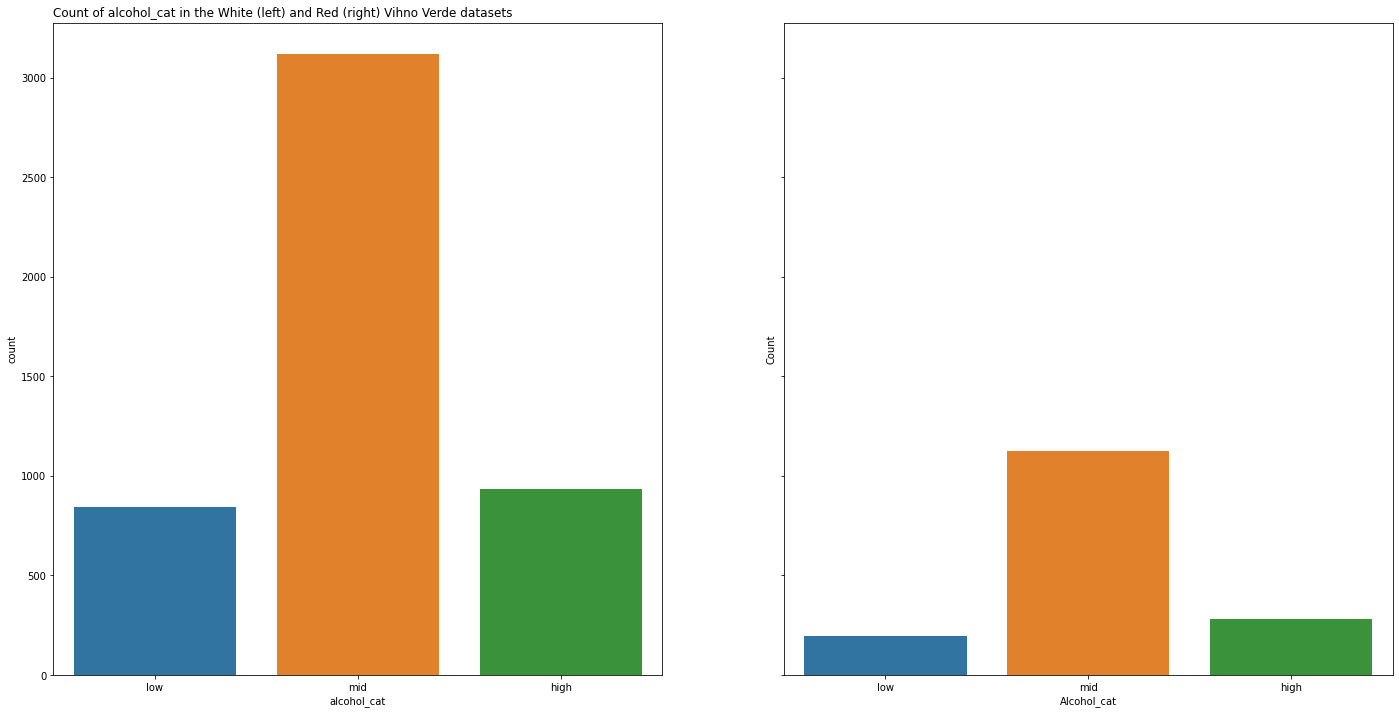

In [140]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2, sharex=True, sharey=True)

ax1.set_title("Count of alcohol_cat in the White (left) and Red (right) Vihno Verde datasets", loc='left')

sns.countplot(data=white_vihno_dataset, x="alcohol_cat", ax=ax1, order=['low', 'mid', 'high'])
sns.countplot(data=red_vihno_dataset, x="alcohol_cat", ax=ax2, order=['low', 'mid', 'high'])

plt.xlabel("Alcohol_cat")
plt.ylabel("Count")
plt.show()
plt.close()

Histogram to shows the number of wines at each alcohol_cat rated a certain quality. The y axis had to be log scaled to make sure each bar was shown.

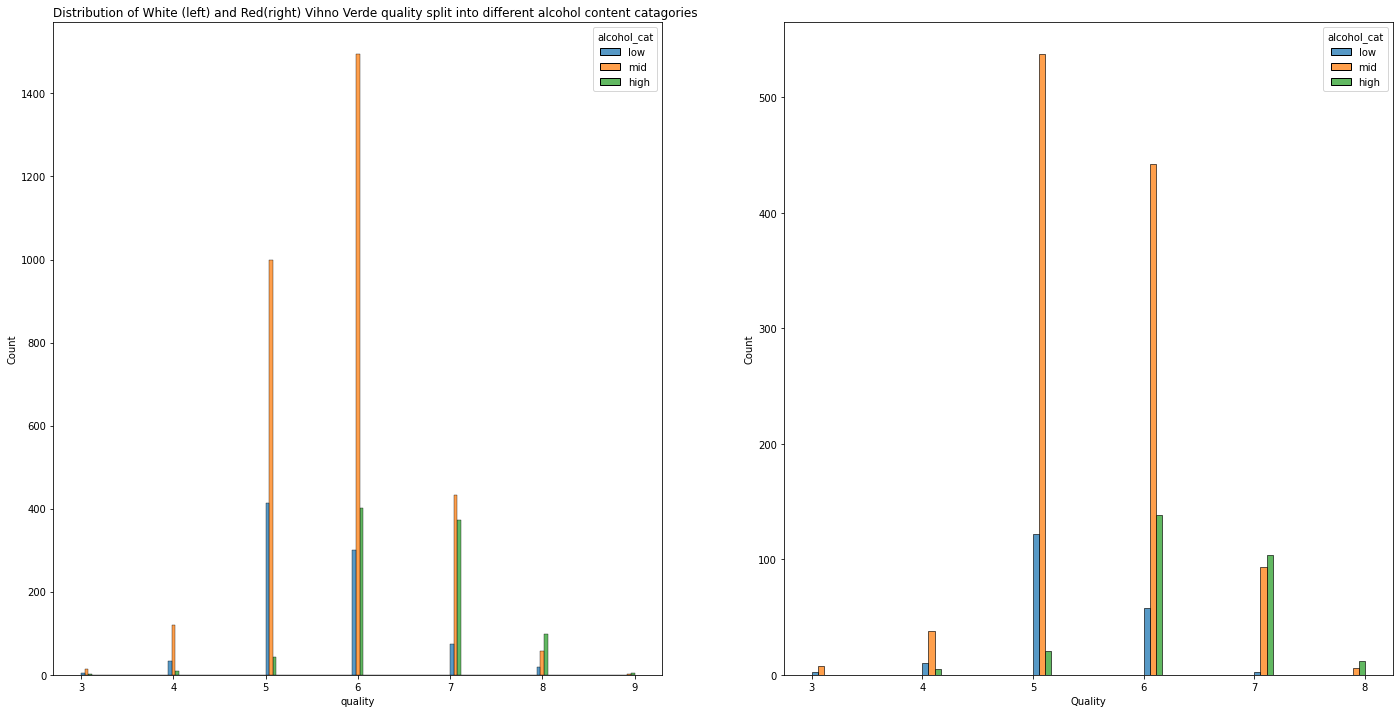

In [137]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2)#, sharex=True, sharey=True)

ax1.set_title("Distribution of White (left) and Red(right) Vihno Verde quality split into different alcohol content catagories", loc='left')

sns.histplot(data=white_vihno_dataset, x="quality", hue="alcohol_cat", multiple="dodge", ax=ax1, hue_order=['low', 'mid', 'high'])
sns.histplot(data=red_vihno_dataset, x="quality", hue="alcohol_cat", multiple="dodge", ax=ax2, hue_order=['low', 'mid', 'high'])

plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

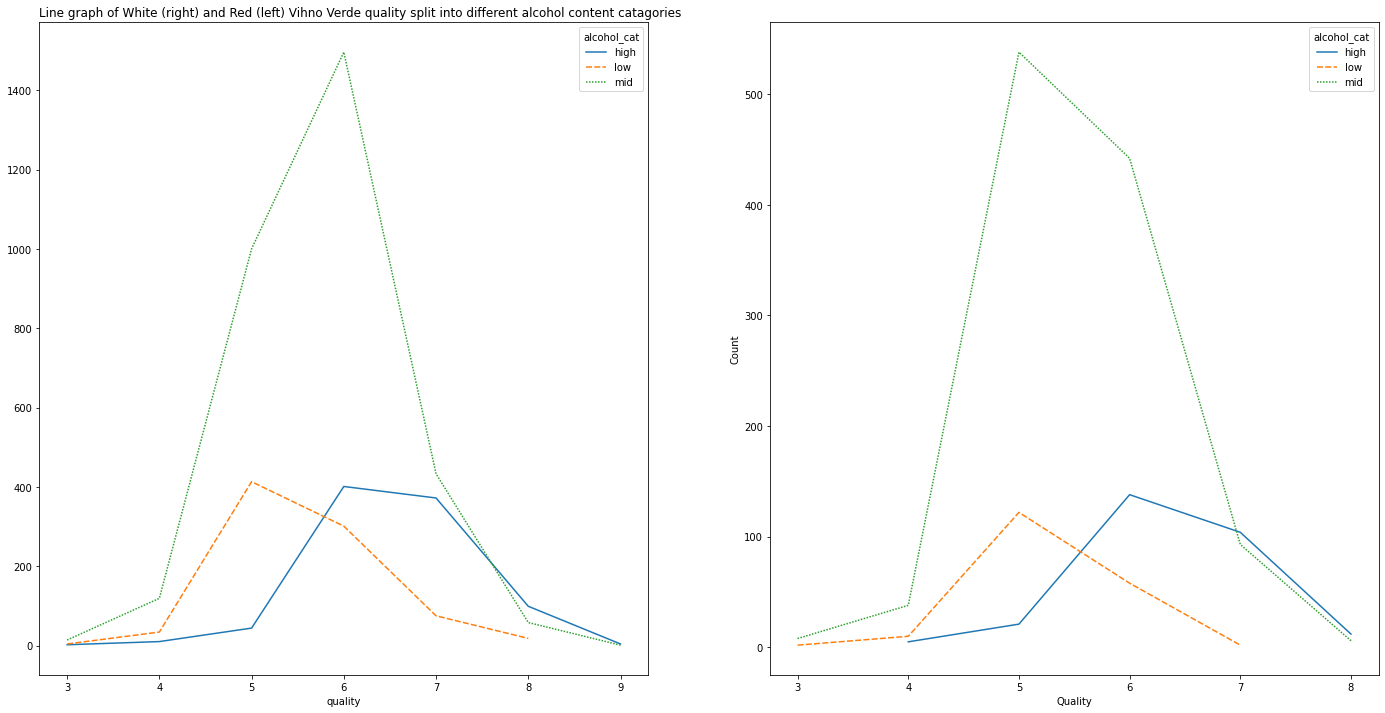

In [139]:
white_sub_dataset = white_vihno_dataset.pivot_table(index='quality', columns='alcohol_cat', values='alcohol', aggfunc='count')
red_sub_dataset = red_vihno_dataset.pivot_table(index='quality', columns='alcohol_cat', values='alcohol', aggfunc='count')

fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2)#, sharex=True, sharey=True)

ax1.set_title("Line graph of White (right) and Red (left) Vihno Verde quality split into different alcohol content catagories", loc='left')

sns.lineplot(data=white_sub_dataset, ax=ax1)
sns.lineplot(data=red_sub_dataset, ax=ax2)

plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()